In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Fixer la graine aléatoire pour la reproductibilité
np.random.seed(2)

In [ ]:
# Lire les données depuis un fichier CSV
df = pd.read_csv("dataset.csv")
# Afficher les dimensions du dataframe
df.shape

(200, 3)

In [ ]:
df.head()

,x1,x2,target
0,1.065701,1.645795,1.0
1,0.112153,1.005711,1.0
2,-1.469113,0.598036,1.0
3,-1.554499,1.034249,1.0
4,-0.097040,-0.146800,0.0


In [ ]:
# Afficher le décompte des valeurs de la variable cible
df['target'].value_counts()

0.0    103
1.0     97
Name: target, dtype: int64

Text(0.5, 1.0, 'Distribution of the target variable')

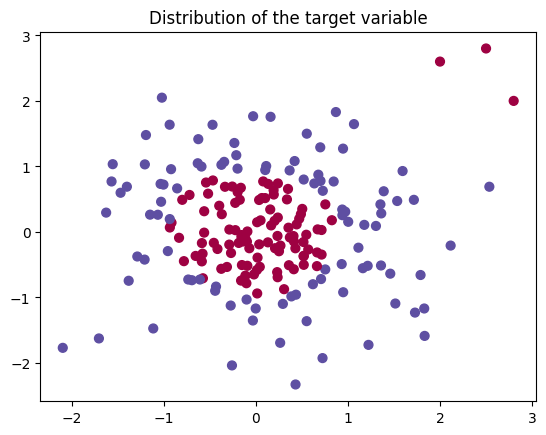

In [ ]:
# Tracer un nuage de points pour visualiser la distribution de la variable cible
plt.scatter(df['x1'], df['x2'], c=df['target'].values.reshape(200,), s=40, cmap=plt.cm.Spectral)
plt.title('Distribution of the target variable')

In [ ]:
# Préparer les données pour l'entraînement du modèle
X = df[['x1','x2']].values.T
Y = df['target'].values.reshape(1,-1)
X.shape,Y.shape

((2, 200), (1, 200))

In [ ]:
m = X.shape[1]             # Nombre d'échantillons d'entraînement

# Définir les hyperparamètres du modèle
n_x = 2                    # Nombre de neurones dans la première couche
n_h = 10                   # Nombre de neurones dans la couche cachée
n_y = 1                    # Nombre de neurones dans la couche de sortie
num_of_iters = 1000
learning_rate = 0.3

In [ ]:
# Fonction d'activation sigmoid
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
# Initialiser les paramètres du modèle
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))

    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
      }
    return parameters

In [ ]:
# Propagation avant dans le réseau neuronal
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
      "A1": A1,
      "A2": A2
     }
    return A2, cache

In [ ]:
# Calculer la fonction de coût
def calculate_cost(A2, Y):
    cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
    cost = np.squeeze(cost)
    return cost

In [ ]:
# Rétropropagation dans le réseau neuronal
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
    "dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2
    }

    return grads

In [ ]:
# Mettre à jour les paramètres du modèle
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2

    new_parameters = {
    "W1": W1,
    "W2": W2,
    "b1" : b1,
    "b2" : b2
    }

    return new_parameters

In [ ]:
# Définir le modèle d'apprentissage
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate,display_loss=False):
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = calculate_cost(a2, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        if display_loss:
            if(i%100 == 0):
                print('Cost after iteration# {:d}: {:f}'.format(i, cost))

    return parameters

In [ ]:
# Entraîner le modèle
trained_parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate,display_loss=True)

Cost after iteration# 0: 0.727895
Cost after iteration# 100: 0.438707
Cost after iteration# 200: 0.308236
Cost after iteration# 300: 0.239390
Cost after iteration# 400: 0.200191
Cost after iteration# 500: 0.175058
Cost after iteration# 600: 0.157424
Cost after iteration# 700: 0.144189
Cost after iteration# 800: 0.133626
Cost after iteration# 900: 0.124717
Cost after iteration# 1000: 0.116933


In [ ]:
# Fonction de prédiction
def predict(parameters, X):
    A2, cache = forward_prop(X,parameters)
    predictions = A2 > 0.5

    return predictions

In [ ]:
# Tracer la frontière de décision
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.reshape(200,), cmap=plt.cm.Spectral)

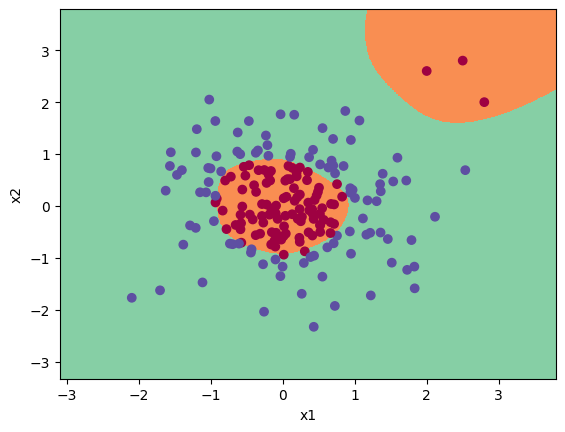

In [ ]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(trained_parameters, x.T), X, Y)

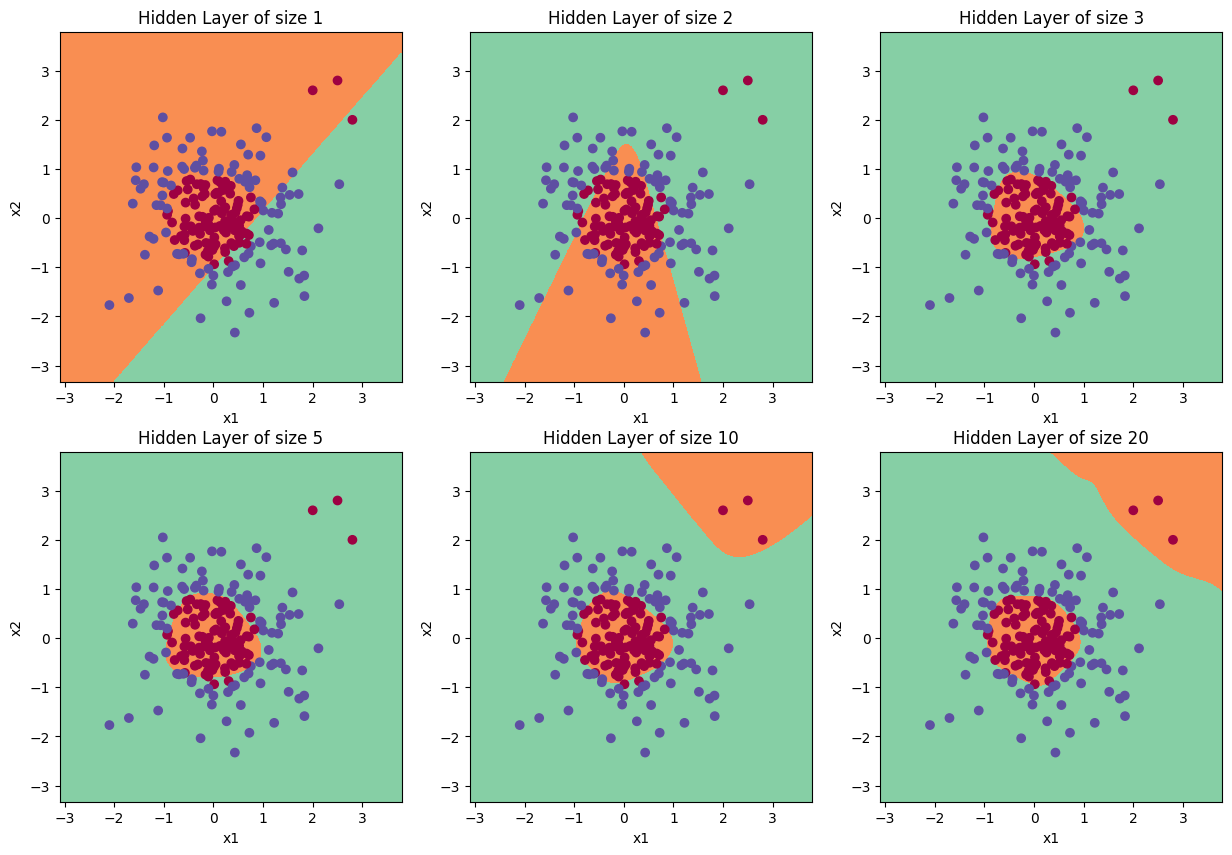

In [ ]:
# Créer une figure pour afficher les graphiques
plt.figure(figsize=(15, 10))
hidden_layer_sizes = [1, 2, 3, 5, 10,20]
# Boucle pour tester différentes tailles de couches cachées
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(2, 3, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
# Entraîner le modèle avec la taille de la couche cachée actuelle

    parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)
# Tracer la frontière de décision
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

# Nouvelle section